In [2]:
#this cell contains all the imports needed by the pipeline
#to run it on the browser: jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
#this cell contains all the imports needed by the pipeline
#to run it on the browser: jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
import os
import time

import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import statistics
import csv

from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import BackendSampler
from qiskit_algorithms import QAOA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from collections import defaultdict

In [3]:
bootqa_programs = ["gsdtsr","paintcontrol", "iofrol", "elevator", "elevator2"]
bootqa_programs_rep_values = {"gsdtsr":1,"paintcontrol":1,"iofrol":2, "elevator":4, "elevator2":4}
experiments = 10

In [4]:
def get_data(data_name):
    """Read the datasets"""
    if data_name == "elevator":
        data = pd.read_csv("datasets/quantum_sota_datasets/elevator.csv", dtype={"cost": int, "input_div": float})
    elif data_name == "elevator2":
        data = pd.read_csv("datasets/quantum_sota_datasets/elevator.csv", dtype={"cost": int, "pcount": int, "dist": int})
    else:
        data = pd.read_csv("datasets/quantum_sota_datasets/" + data_name + ".csv", dtype={"time": float, "rate": float})
        data = data[data['rate'] > 0]
    return data

Tot suite cost: 48374589.23585534
Tot suite rate: 8.743228702983895
SelectQAOA Decomposition Time(ms): 2.3207664489746094
Cluster 6 metrics:
Test Cases: [6]
 - Num. Test Cases: 1.00
 - Execution Cost: 92685.55
 - Failure Rate: 0.3805584281282316
Cluster 27 metrics:
Test Cases: [8, 104, 139, 247, 271]
 - Num. Test Cases: 5.00
 - Execution Cost: 288771.38
 - Failure Rate: 0.08763195412764099
Cluster 47 metrics:
Test Cases: [9, 32, 83, 127, 180]
 - Num. Test Cases: 5.00
 - Execution Cost: 1375122.84
 - Failure Rate: 0.0499362109595096
Cluster 38 metrics:
Test Cases: [10, 41, 205, 206, 233]
 - Num. Test Cases: 5.00
 - Execution Cost: 2875689.90
 - Failure Rate: 0.0372600840243577
Cluster 50 metrics:
Test Cases: [11, 34, 136, 144, 235]
 - Num. Test Cases: 5.00
 - Execution Cost: 1788831.68
 - Failure Rate: 0.043515882759113396
Cluster 46 metrics:
Test Cases: [13, 38, 40, 203, 265]
 - Num. Test Cases: 5.00
 - Execution Cost: 1243729.85
 - Failure Rate: 0.028839715246449002
Cluster 36 metrics

/var/folders/kn/kd67nwcs41113fgwjn39d7fm0000gn/T/ipykernel_4390/2582335470.py:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(clustered_data))  # A colormap with as many colors as clusters


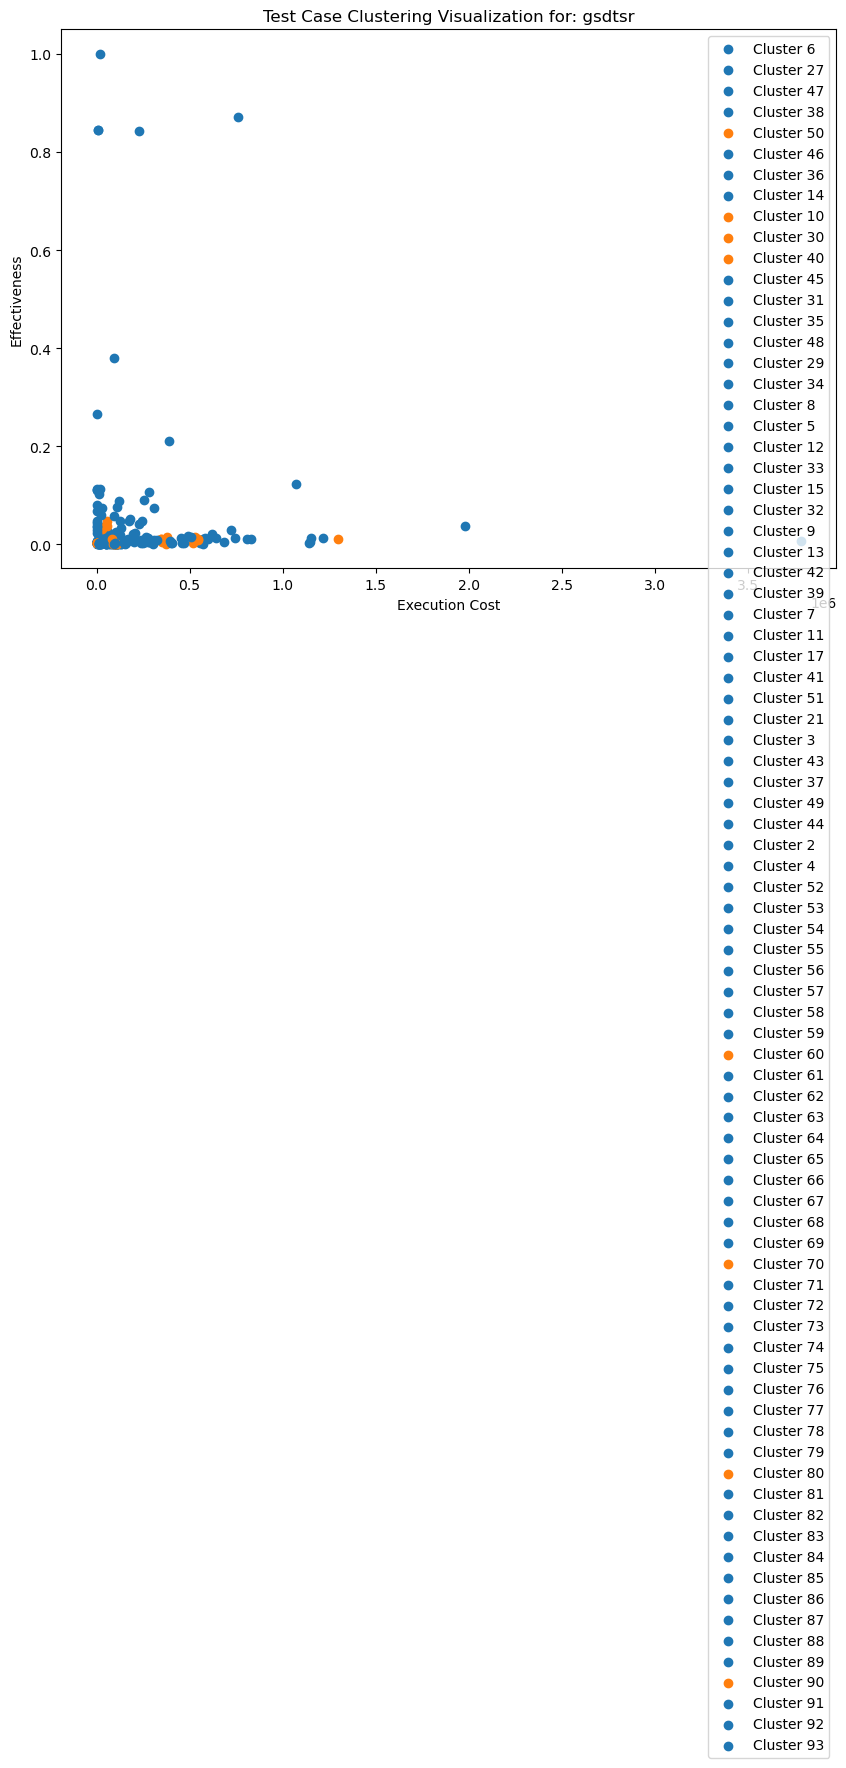

Tot suite cost: 3005225.0
Tot suite rate: 20.317411495740192
SelectQAOA Decomposition Time(ms): 0.6132125854492188
Cluster 5 metrics:
Test Cases: [30]
 - Num. Test Cases: 1.00
 - Execution Cost: 475631.00
 - Failure Rate: 0.6
Cluster 4 metrics:
Test Cases: [62, 77, 80, 84, 86]
 - Num. Test Cases: 5.00
 - Execution Cost: 304628.00
 - Failure Rate: 4.074430945398688
Cluster 6 metrics:
Test Cases: [0, 1, 2, 3, 5]
 - Num. Test Cases: 5.00
 - Execution Cost: 150503.00
 - Failure Rate: 0.5673113637770598
Cluster 7 metrics:
Test Cases: [8, 10, 13, 15, 18]
 - Num. Test Cases: 5.00
 - Execution Cost: 79209.00
 - Failure Rate: 0.9489754305727421
Cluster 8 metrics:
Test Cases: [19, 20, 23, 24, 32]
 - Num. Test Cases: 5.00
 - Execution Cost: 68882.00
 - Failure Rate: 0.8933719946011021
Cluster 9 metrics:
Test Cases: [33, 35, 36, 37, 38]
 - Num. Test Cases: 5.00
 - Execution Cost: 127788.00
 - Failure Rate: 0.6890782021310078
Cluster 10 metrics:
Test Cases: [39, 40, 41, 42, 43]
 - Num. Test Cases: 

/var/folders/kn/kd67nwcs41113fgwjn39d7fm0000gn/T/ipykernel_4390/2582335470.py:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(clustered_data))  # A colormap with as many colors as clusters


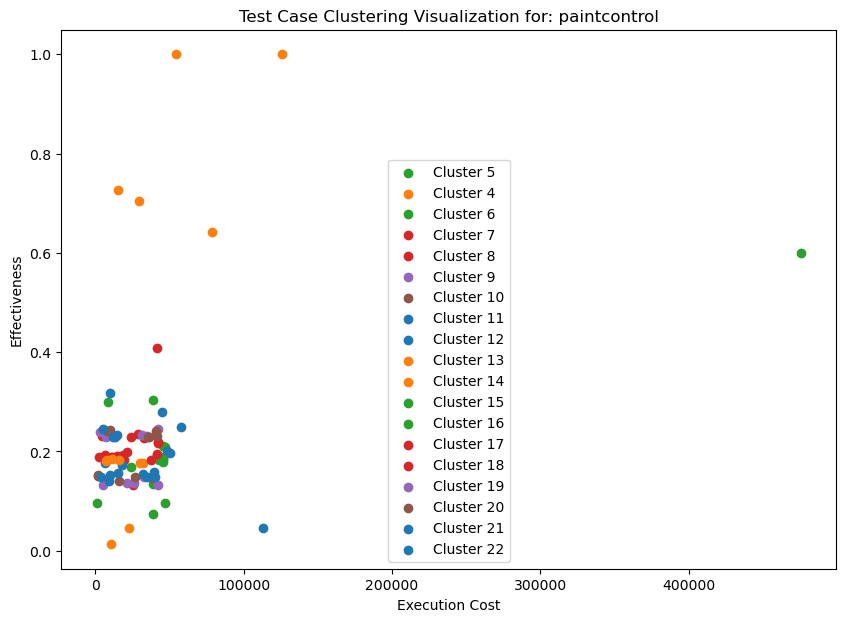

Tot suite cost: 181552513.0
Tot suite rate: 583.2324431573749
SelectQAOA Decomposition Time(ms): 31.996965408325195
Cluster 8 metrics:
Test Cases: [0, 1, 2, 3, 4]
 - Num. Test Cases: 5.00
 - Execution Cost: 290781.00
 - Failure Rate: 1.2771836007130124
Cluster 9 metrics:
Test Cases: [5, 6, 8, 9, 10]
 - Num. Test Cases: 5.00
 - Execution Cost: 286193.00
 - Failure Rate: 1.0606060606060606
Cluster 10 metrics:
Test Cases: [11, 12, 13, 15, 16]
 - Num. Test Cases: 5.00
 - Execution Cost: 292528.00
 - Failure Rate: 1.3127705627705628
Cluster 11 metrics:
Test Cases: [17, 18, 19, 20, 21]
 - Num. Test Cases: 5.00
 - Execution Cost: 285912.00
 - Failure Rate: 1.3127705627705628
Cluster 12 metrics:
Test Cases: [22, 23, 25, 28, 29]
 - Num. Test Cases: 5.00
 - Execution Cost: 281966.00
 - Failure Rate: 1.3078422591607175
Cluster 13 metrics:
Test Cases: [32, 33, 34, 35, 52]
 - Num. Test Cases: 5.00
 - Execution Cost: 280721.00
 - Failure Rate: 1.2955840455840453
Cluster 14 metrics:
Test Cases: [53, 

/var/folders/kn/kd67nwcs41113fgwjn39d7fm0000gn/T/ipykernel_4390/2582335470.py:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(clustered_data))  # A colormap with as many colors as clusters


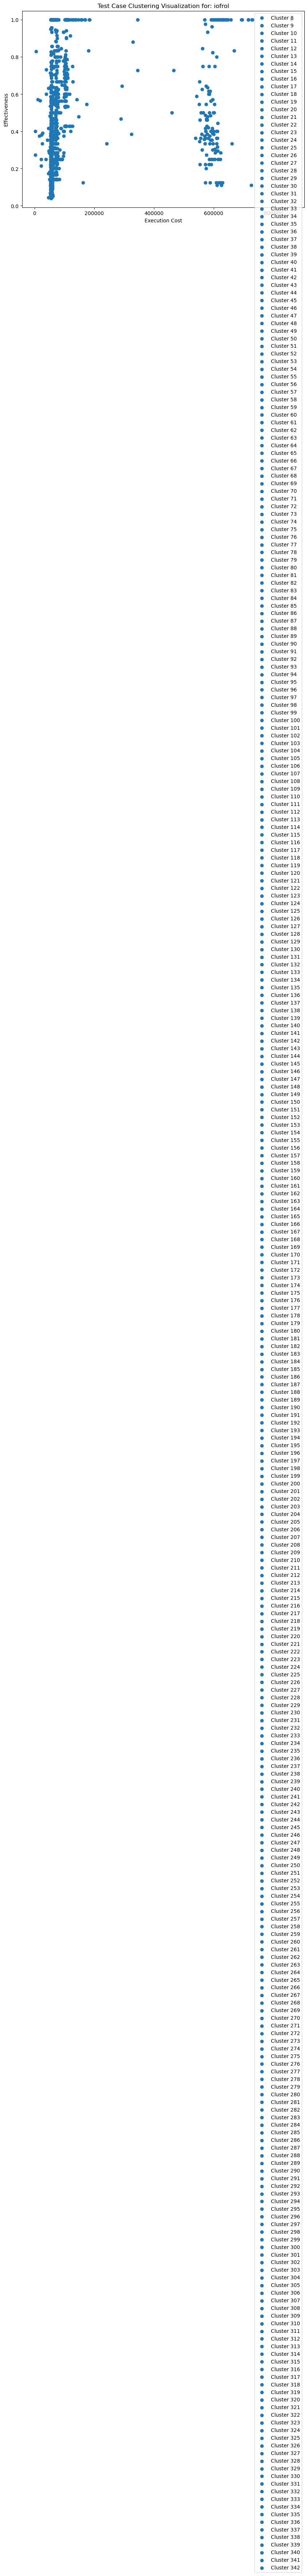

Tot suite cost: 307046
Tot suite input div: 782.986180950525
SelectQAOA Decomposition Time(ms): 35.78495979309082
Cluster 19 metrics:
Test Cases: [19, 24, 501, 607]
 - Num. Test Cases: 4.00
 - Execution Cost: 514.00
 - Failure Rate: 5.844140572578977
Cluster 42 metrics:
Test Cases: [34, 330]
 - Num. Test Cases: 2.00
 - Execution Cost: 549.00
 - Failure Rate: 4.0
Cluster 29 metrics:
Test Cases: [38, 567, 668, 920, 1267]
 - Num. Test Cases: 5.00
 - Execution Cost: 1277.00
 - Failure Rate: 3.2413329965922304
Cluster 36 metrics:
Test Cases: [44]
 - Num. Test Cases: 1.00
 - Execution Cost: 263.00
 - Failure Rate: 3.0
Cluster 13 metrics:
Test Cases: [161, 1275, 1684]
 - Num. Test Cases: 3.00
 - Execution Cost: 364.00
 - Failure Rate: 6.34629285305086
Cluster 70 metrics:
Test Cases: [221, 1022, 1036, 1817]
 - Num. Test Cases: 4.00
 - Execution Cost: 548.00
 - Failure Rate: 3.1481272386261514
Cluster 17 metrics:
Test Cases: [248, 637, 1230, 1353]
 - Num. Test Cases: 4.00
 - Execution Cost: 288

/var/folders/kn/kd67nwcs41113fgwjn39d7fm0000gn/T/ipykernel_4390/2582335470.py:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(clustered_data))  # A colormap with as many colors as clusters


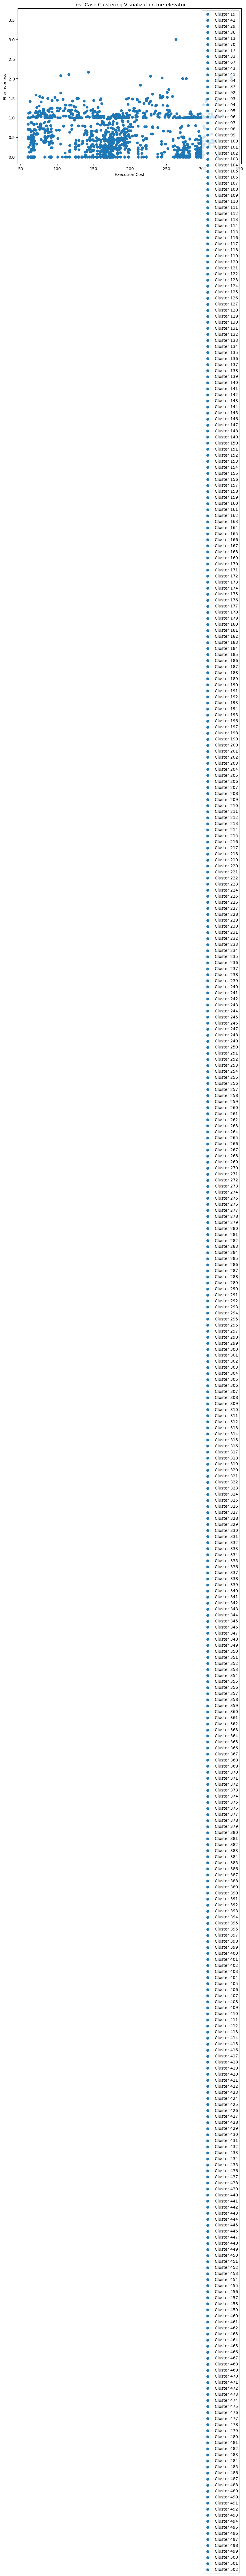

Tot suite cost: 307046
Tot suite pcount: 19878
Tot suite dist: 61549
SelectQAOA Decomposition Time(ms): 41.19706153869629
Cluster 68 metrics:
Test Cases: [173, 212, 888, 1861]
 - Num. Test Cases: 4.00
 - Execution Cost: 1068.00
 - PCount: 69
 - Dist: 317
Cluster 81 metrics:
Test Cases: [312, 846, 1539]
 - Num. Test Cases: 3.00
 - Execution Cost: 583.00
 - PCount: 75
 - Dist: 232
Cluster 74 metrics:
Test Cases: [369, 386, 511, 1052]
 - Num. Test Cases: 4.00
 - Execution Cost: 1250.00
 - PCount: 71
 - Dist: 259
Cluster 85 metrics:
Test Cases: [410, 966, 1077, 1303, 1481]
 - Num. Test Cases: 5.00
 - Execution Cost: 1576.00
 - PCount: 178
 - Dist: 557
Cluster 62 metrics:
Test Cases: [480, 628, 698, 1429, 1851]
 - Num. Test Cases: 5.00
 - Execution Cost: 1201.00
 - PCount: 57
 - Dist: 247
Cluster 53 metrics:
Test Cases: [723]
 - Num. Test Cases: 1.00
 - Execution Cost: 339.00
 - PCount: 65
 - Dist: 181
Cluster 89 metrics:
Test Cases: [936, 1247, 1448]
 - Num. Test Cases: 3.00
 - Execution C

/var/folders/kn/kd67nwcs41113fgwjn39d7fm0000gn/T/ipykernel_4390/2582335470.py:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(clustered_data))  # A colormap with as many colors as clusters


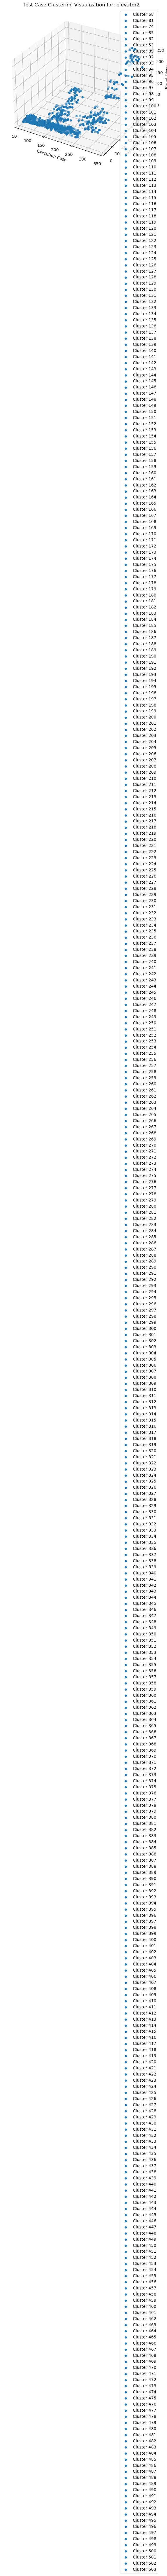

In [5]:
bootqa_clusters = dict()

for bootqa_program in bootqa_programs:
    data = get_data(bootqa_program)
    
    # Total suite metrics
    if bootqa_program == "elevator" or bootqa_program == "elevator2":
        test_cases_costs = data["cost"].tolist()
    else:
        test_cases_costs = data["time"].tolist()
    
    if bootqa_program == "elevator":
        test_cases_effectiveness = data["input_div"].tolist()
        print(f"Tot suite cost: {sum(test_cases_costs)}")
        print(f"Tot suite input div: {sum(test_cases_effectiveness)}")
    elif bootqa_program == "elevator2":
        test_cases_pcount = data["pcount"].tolist()
        test_cases_dist = data["dist"].tolist()
        print(f"Tot suite cost: {sum(test_cases_costs)}")
        print(f"Tot suite pcount: {sum(test_cases_pcount)}")
        print(f"Tot suite dist: {sum(test_cases_dist)}")
    else:
        test_cases_effectiveness = data["rate"].tolist()
        print(f"Tot suite cost: {sum(test_cases_costs)}")
        print(f"Tot suite rate: {sum(test_cases_effectiveness)}")
        
    # Normalize data
    if bootqa_program != "elevator2":
        cluster_data = np.column_stack((test_cases_costs, test_cases_effectiveness))
    else:
        cluster_data = np.column_stack((test_cases_costs, test_cases_pcount, test_cases_dist))
    
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(cluster_data)
    
    if bootqa_program == "elevator" or bootqa_program == "elevator2":
        num_clusters = 90
    if bootqa_program == "gsdtsr":
        num_clusters = 50
    if bootqa_program == "iofrol":
        num_clusters = 6
    if bootqa_program == "paintcontrol":
        num_clusters = 4
        
    max_cluster_dim = 5
    
    # Step 2: Perform K-Means Clustering
    start = time.time()
    linkage_matrix = linkage(normalized_data, method='ward')
    clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
    
    # Organize test cases by cluster
    clustered_data = defaultdict(list)
    for idx, cluster_id in enumerate(clusters):
        clustered_data[cluster_id].append(idx)
    
    # Process clusters to ensure none exceed max_cluster_dim
    new_cluster_id = max(clustered_data.keys()) + 1  # Start new IDs after existing ones
    to_add = []  # Collect new smaller clusters
    
    for cluster_id, elements in list(clustered_data.items()):  # Avoid modifying dict during iteration
        if len(elements) > max_cluster_dim:
            num_splits = -(-len(elements) // max_cluster_dim)  # Ceiling division to get the required number of splits
            split_size = -(-len(elements) // num_splits)  # Recalculate to distribute elements evenly
            
            # Split while keeping sizes balanced
            parts = [elements[i:i + split_size] for i in range(0, len(elements), split_size)]
    
            # Ensure all new clusters are within max_cluster_dim
            for part in parts:
                if len(part) > max_cluster_dim:
                    raise ValueError(f"A split cluster still exceeds max_cluster_dim ({len(part)} > {max_cluster_dim})!")
    
            # Add new parts to the new clusters
            to_add.extend(parts)
    
            # Remove original large cluster
            del clustered_data[cluster_id]
    
    # Assign new IDs to split parts
    for part in to_add:
        if part:  # Only add if the part is non-empty
            clustered_data[new_cluster_id] = part
            new_cluster_id += 1
    end = time.time()
    print("SelectQAOA Decomposition Time(ms): " + str((end-start)*1000))
    
    bootqa_clusters[bootqa_program] = clustered_data
    
    # Step 3: Calculate the metrics for each refined cluster
    cluster_metrics = {}
    for cluster_id, members in clustered_data.items():
        tot_cluster_costs = sum(test_cases_costs[i] for i in members)
        if bootqa_program != "elevator2":
            tot_cluster_effectiveness = sum(test_cases_effectiveness[i] for i in members)
        else:
            tot_cluster_pcount = sum(test_cases_pcount[i] for i in members)
            tot_cluster_dist = sum(test_cases_dist[i] for i in members)
        if bootqa_program != "elevator2":
            cluster_metrics[cluster_id] = {
                "tot_cluster_cost": tot_cluster_costs,
                "tot_cluster_rates": tot_cluster_effectiveness
            }
        else:
            cluster_metrics[cluster_id] = {
                "tot_cluster_cost": tot_cluster_costs,
                "tot_cluster_pcount": tot_cluster_pcount,
                "tot_cluster_dist": tot_cluster_dist
            }
        print(f"Cluster {cluster_id + 1} metrics:")
        print(f"Test Cases: {members}")
        print(f" - Num. Test Cases: {len(members):.2f}")
        print(f" - Execution Cost: {tot_cluster_costs:.2f}")
        if bootqa_program != "elevator2":
            print(f" - Failure Rate: {tot_cluster_effectiveness}")
        else:
            print(f" - PCount: {tot_cluster_pcount}")
            print(f" - Dist: {tot_cluster_dist}")
    
    print("===========================================================================")    
    
    for cluster_id in clustered_data.keys():
        if len(clustered_data[cluster_id]) > max_cluster_dim:
            print("Program: " + bootqa_program)
            print("Test cases of cluster " + str(cluster_id) + ": " + str(len(clustered_data[cluster_id])))
    
    # Plotting the clusters in 3D space
    fig = plt.figure(figsize=(10, 7))
    if bootqa_program != "elevator2":
        ax = fig.add_subplot(111)
    else:
        ax = fig.add_subplot(111, projection='3d')
    
    # Extracting data for plotting
    exec_costs = np.array(test_cases_costs)
    if bootqa_program != "elevator2":
        effectiveness = np.array(test_cases_effectiveness)
    else:
        pcounts = np.array(test_cases_pcount)
        dists = np.array(test_cases_dist)
    
    # Plot each refined cluster with a different color
    colors = plt.cm.get_cmap("tab10", len(clustered_data))  # A colormap with as many colors as clusters
    for cluster_id, members in clustered_data.items():
        if bootqa_program != "elevator2":
            ax.scatter(
                exec_costs[members], 
                effectiveness[members], 
                color=colors(cluster_id % 10), 
                label=f"Cluster {cluster_id + 1}"
            )
        else:
            ax.scatter(
                exec_costs[members], 
                pcounts[members], 
                dists[members],
                color=colors(cluster_id % 10), 
                label=f"Cluster {cluster_id + 1}"
            )
    
    # Label the axes
    ax.set_xlabel("Execution Cost")
    if bootqa_program != "elevator2":
        ax.set_ylabel("Effectiveness")
    else:
        ax.set_ylabel("Passengers Count")
        ax.set_zlabel("Travel Distance")
    ax.legend()
    ax.set_title("Test Case Clustering Visualization for: " + bootqa_program)
    
    # Display the plot
    plt.show()


In [6]:
def make_linear_terms_bootqa(cluster_test_cases, test_cases_costs, test_cases_rates, alpha):
    """Making the linear terms of the QUBO"""
    max_cost = max(test_cases_costs)
    
    estimated_costs = []

    #linear coefficients, that are the diagonal of the matrix encoding the QUBO
    for test_case in cluster_test_cases:
        estimated_costs.append((alpha * ((test_cases_costs[test_case])/max_cost)) - ((1-alpha)*test_cases_rates[test_case]))
    
    return np.array(estimated_costs)

def make_linear_terms_bootqa2(cluster_test_cases, test_cases_costs, pcount, dist, alpha):
    """Making the linear terms of the QUBO for the elevator2 problem"""
    max_cost = max(test_cases_costs)
    max_pcount = max(pcount)
    max_dist = max(dist)
    
    estimated_costs = []

    #linear coefficients, that are the diagonal of the matrix encoding the QUBO
    for test_case in cluster_test_cases:
        estimated_costs.append(((alpha/3) * ((test_cases_costs[test_case])/max_cost)) - ((alpha/3) * ((pcount[test_case])/max_pcount)) - ((alpha/3) * ((dist[test_case])/max_dist)))
    
    return np.array(estimated_costs)

In [7]:
def create_linear_qubo(linear_terms):
    """This function is the one that has to encode the QUBO problem that QAOA will have to solve. The QUBO problem specifies the optimization to solve and a quadratic binary unconstrained problem"""
    qubo = QuadraticProgram()
    
    for i in range(0,len(linear_terms)):
        qubo.binary_var('x%s' % (i))

    qubo.minimize(linear=linear_terms)

    return qubo

In [8]:
def bootstrap_confidence_interval(data, num_samples, confidence_alpha=0.95):
    """This function determines the statistical range within we would expect the mean value of execution times to fall; it relies on the bootstrapping strategy, which allows the calculation of the confidence interval by repeated sampling (with replacement) from the existing data to obtain an estimate of the confidence interval."""
    sample_means = []
    for _ in range(num_samples):
        bootstrap_sample = [random.choice(data) for _ in range(len(data))]
        sample_mean = np.mean(bootstrap_sample)
        sample_means.append(sample_mean)
    
    lower_percentile = (1 - confidence_alpha) / 2 * 100
    upper_percentile = (confidence_alpha + (1 - confidence_alpha) / 2) * 100
    lower_bound = np.percentile(sample_means, lower_percentile)
    upper_bound = np.percentile(sample_means, upper_percentile)
    
    return lower_bound, upper_bound

In [ ]:
bootqa_alphas = {"gsdtsr": 0.2,"paintcontrol": 0.80, "iofrol": 0.82, "elevator": 0.50, "elevator2": 2.9}
run_times_dictionary = {"gsdtsr": [],"paintcontrol": [], "iofrol": [], "elevator": [], "elevator2": []}

noise_dep = NoiseModel()

# Define a 1% depolarizing error for single-qubit and two-qubit gates
depolarizing_error_1q = depolarizing_error(0.01, 1)  # 1% depolarizing error for single-qubit gates
depolarizing_error_2q = depolarizing_error(0.01, 2)  # 1% depolarizing error for two-qubit gates

# Apply depolarizing noise to single-qubit gates
noise_dep.add_all_qubit_quantum_error(depolarizing_error_1q, ['rx', 'rz', 'sx', 'x', 'h'])

# Apply depolarizing noise to two-qubit gates
noise_dep.add_all_qubit_quantum_error(depolarizing_error_2q, ['cx', 'cz', 'swap'])

sim_dep = AerSimulator(noise_model=noise_dep)

algorithm_globals.random_seed = 10598

for bootqa_program in bootqa_programs:
    qaoa_mes = QAOA(sampler=BackendSampler(backend=sim_dep), optimizer=COBYLA(100), reps=bootqa_programs_rep_values[bootqa_program])
    qaoa = MinimumEigenOptimizer(qaoa_mes)  # using QAOA
    data = get_data(bootqa_program)
    # Total suite metrics
    if bootqa_program != "elevator2" and bootqa_program != "elevator":
        test_cases_costs = data["time"].tolist()
    else:
        test_cases_costs = data["cost"].tolist()
    test_cases_rates = None
    test_cases_pcount = None
    test_cases_dist = None
    if bootqa_program != "elevator2":
        test_cases_rates = data["input_div"].tolist() if bootqa_program == "elevator" else data["rate"].tolist()
    else:
        test_cases_pcount = data["pcount"].tolist()
        test_cases_dist = data["dist"].tolist()
    
    final_test_suite_costs = []
    final_effectivenesses = []
    final_pcounts = []
    final_dists = []
    for i in range(experiments):
        final_selected_cases = []
        cluster_number = 0
        for cluster_id in bootqa_clusters[bootqa_program]:
            print("Cluster: " + str(bootqa_clusters[bootqa_program][cluster_id]))
            linear_terms = None
            if bootqa_program != "elevator2":
                linear_terms = make_linear_terms_bootqa(bootqa_clusters[bootqa_program][cluster_id], test_cases_costs, test_cases_rates, bootqa_alphas[bootqa_program])
            else:
                linear_terms = make_linear_terms_bootqa2(bootqa_clusters[bootqa_program][cluster_id], test_cases_costs,test_cases_pcount, test_cases_dist, bootqa_alphas[bootqa_program])
            linear_qubo = create_linear_qubo(linear_terms)
            print("Linear QUBO: " + str(linear_qubo))
            #for each iteration get the result
            s = time.time()
            qaoa_result = qaoa.solve(linear_qubo)
            e = time.time()
            print("Program: " + str(bootqa_program) + ". It: " + str(i))
            print("QAOA Result: " + str(qaoa_result))
            run_times_dictionary[bootqa_program].append((e-s)*1000)
            
            variable_values = qaoa_result.x
            indexes_selected_cases = [index for index, value in enumerate(variable_values) if value == 1]
            print("Indexes of selected tests to convert. " + str(indexes_selected_cases))
            selected_tests = []
            for index in indexes_selected_cases:
                selected_tests.append(bootqa_clusters[bootqa_program][cluster_id][index])
            print("Selected tests: " + str(selected_tests))
            for selected_test in selected_tests:
                if selected_test not in final_test_suite_costs:
                    final_selected_cases.append(selected_test)
            
        #compute the final test suite cost
        final_test_suite_cost = 0
        for selected_test_case in final_selected_cases:
            final_test_suite_cost += test_cases_costs[selected_test_case]
        final_test_suite_costs.append(final_test_suite_cost)
            
        #compute the total failure rate
        if bootqa_program != "elevator2":
            final_effectiveness = 0
            for selected_test_case in final_selected_cases:
                final_effectiveness += test_cases_rates[selected_test_case]
            final_effectivenesses.append(final_effectiveness)
        else:
            final_pcount = 0
            for selected_test_case in final_selected_cases:
                final_pcount += test_cases_pcount[selected_test_case]
            final_pcounts.append(final_pcount)
            
            final_dist = 0
            for selected_test_case in final_selected_cases:
                final_dist += test_cases_dist[selected_test_case]
            final_dists.append(final_dist)
    
    print("Final Test Suite: " + str(final_selected_cases))
    #compute the qpu access times
    qpu_run_times_without_zeros = []
    for access_time in run_times_dictionary[bootqa_program]:
      if access_time != 0:
        qpu_run_times_without_zeros.append(access_time)
    lower_bound, upper_bound = bootstrap_confidence_interval(qpu_run_times_without_zeros, 1000, 0.95)
    for i in range(len(run_times_dictionary[bootqa_program])):
      if run_times_dictionary[bootqa_program][i] == 0:
          run_times_dictionary[bootqa_program][i] = upper_bound
    average_qpu_access_time = statistics.mean(run_times_dictionary[bootqa_program]) 
    
    if bootqa_program == "elevator2":
        var_names = ["final_test_suite_costs", "final_pcounts", "final_dists",
                 "average_qpu_access_time(ms)", "stdev_qpu_access_time(ms)", "all_qpu_access_times(ms)",
                 "qpu_lower_bound(ms)", "qpu_upper_bound(ms)", "qpu_run_times(ms)"]
        values = [final_test_suite_costs, final_pcounts, final_dists, average_qpu_access_time, 
                  statistics.stdev(run_times_dictionary[bootqa_program]), run_times_dictionary[bootqa_program],
                  lower_bound, upper_bound, run_times_dictionary[bootqa_program]]
    else:
        var_names = ["final_test_suite_costs", "final_effectivenesses",
                     "average_qpu_access_time(ms)", "stdev_qpu_access_time(ms)", "all_qpu_access_times(ms)",
                     "qpu_lower_bound(ms)", "qpu_upper_bound(ms)", "qpu_run_times(ms)"]
        values = [final_test_suite_costs, final_effectivenesses, average_qpu_access_time, 
                  statistics.stdev(run_times_dictionary[bootqa_program]), run_times_dictionary[bootqa_program],
                  lower_bound, upper_bound, run_times_dictionary[bootqa_program]]
    
    # Ensure the directory exists
    output_dir = "results/selectqaoa/depolarizing_sim/01"
    os.makedirs(output_dir, exist_ok=True)
    
    # Path to save the file
    file_path = os.path.join(output_dir, f"{bootqa_program}.csv")
    
    # Writing results to the file
    with open(file_path, "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(var_names)
        writer.writerow(values)
    print(f"Results saved to {file_path}")

/var/folders/kn/kd67nwcs41113fgwjn39d7fm0000gn/T/ipykernel_4390/3229917724.py:21: DeprecationWarning: The class ``qiskit.primitives.backend_sampler.BackendSampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `BackendSampler` class is `BackendSamplerV2`.
  qaoa_mes = QAOA(sampler=BackendSampler(backend=sim_dep), optimizer=COBYLA(100), reps=bootqa_programs_rep_values[bootqa_program])


Cluster: [6]
Linear QUBO: minimize -0.29955299381886735*x0 (1 variables, 0 constraints, '')
Program: gsdtsr. It: 0
QAOA Result: fval=-0.29955299381886735, x0=1.0, status=SUCCESS
Indexes of selected tests to convert. [0]
Selected tests: [6]
Cluster: [8, 104, 139, 247, 271]
Linear QUBO: minimize -0.008515799490323302*x0 - 0.012441738325510326*x1 - 0.00890115948340612*x2 - 0.017257251338785563*x3 - 0.00774263647196537*x4 (5 variables, 0 constraints, '')
Program: gsdtsr. It: 0
QAOA Result: fval=-0.054858585109990685, x0=1.0, x1=1.0, x2=1.0, x3=1.0, x4=1.0, status=SUCCESS
Indexes of selected tests to convert. [0, 1, 2, 3, 4]
Selected tests: [8, 104, 139, 247, 271]
Cluster: [9, 32, 83, 127, 180]
Linear QUBO: minimize 0.0036492422216990953*x0 + 0.006582698841021259*x1 + 0.01028352758028979*x2 + 0.010867999105857576*x3 + 0.0012733309574669265*x4 (5 variables, 0 constraints, '')
Program: gsdtsr. It: 0
QAOA Result: fval=0.0, x0=0.0, x1=0.0, x2=0.0, x3=0.0, x4=0.0, status=SUCCESS
Indexes of selec

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.
Traceback (most recent call last):
  File "/opt/anaconda3/envs/SelectQAOA/lib/python3.11/site-packages/scipy/optimize/_cobyla_py.py", line 281, in calcfc
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
    f = sf.fun(x)
        ^^^^^^^^^
  File "/opt/anaconda3/envs/SelectQAOA/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py", line 278, in fun
    self._update_fun()
  File "/opt/anaconda3/envs/SelectQAOA/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py", line 262, in _update_fun
    self._update_fun_impl()
  File "/opt/anaconda3/envs/SelectQAOA/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py", line 163, in update_fun
    self.f = fun_wrapped(self.x)
             ^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/SelectQAOA/lib/python3.11/site-packages/

Program: gsdtsr. It: 0
QAOA Result: fval=-0.0018143894142178749, x0=0.0, x1=0.0, x2=0.0, x3=1.0, x4=0.0, status=SUCCESS
Indexes of selected tests to convert. [3]
Selected tests: [4]
Cluster: [76, 77, 198, 204, 209]
Linear QUBO: minimize 0.0006291090021469303*x0 + 0.0004709139266386086*x1 + 0.0010846434965903987*x2 + 2.9423991767474345e-05*x3 + 0.0012427452904847638*x4 (5 variables, 0 constraints, '')
